<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/2020/%EC%B5%9C%EC%9E%90%EC%98%81/Contours_Simple_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#sementation
은 두가지로 나뉨 

1) semantic segmentation:pixel 단위로 물체를 구분한 후 어떤 class인지 구분

2) instance segmantation:같은 class라도 다른 것이라면 구분 ex) 사람x 엄마o ,아빠 o 

class 빵틀 instance: 빵 (object중 구분할 수 있는 존재)
binary에서 segmentation이 잘됨 

#contour 
영상에서 같은 색상이나 같은 intensity의 연속된 점으로 구성된 곡선
object detection등에서 활용됨
일반적으로 등고선,윤곽선, 외곽선으로 번역됨


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from urllib import request 

url = 'https://raw.githubusercontent.com/dsaint31x/OpenCV_Python_Tutorial/master/images/shapes.png'
fstr = 'shapes.png'
request.urlretrieve(url,fstr)
print('saved ok : shapes.png')



saved ok : shapes.png


(150, 423)


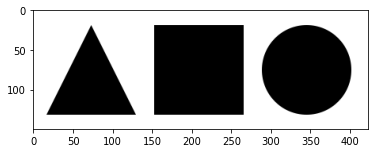

In [ ]:
img = cv2.imread('./shapes.png')
img_ori = img.copy()

img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) # contour은 gray scale로 바꾸어 출력
print(img_gray.shape)
plt.imshow(img_gray,cmap='gray')
#plt.axis('off')
plt.show()


# Contour
동일한 color or intensity(등고선)를 가진 regison의 boundary를 연결한 선을 가르킴.
* shape analysis
* object detection   **케니 많이씀**

OpenCV의 경우 Contour를 처리할 때 다음을 기본으로 함.
* binary image에서 처리됨. (thresholding or canny edge detection등등이 선처리로 활용)
* Object 는 흰색으로 **1** 
* background 는 검정색으로 처리. **0**

> 과거 opencv의 경우, augment로 넘겨진 영상 데이터를 변경시킴으로 반드시 복사본을 만들어 처리해야 함.

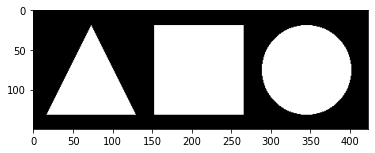

In [ ]:
# convert to a binary image and invert image
ret_threshold, binary_img = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)  #_INV 반대 ##127넘으면 255로 이후 inverse
plt.imshow(binary_img, cmap='gray') #gray넣어준 이유는 푸르딩딩하게 나오니까 넣어준 것임 

# `cv2.findContours(param1,param2,param3)`

## 첫번째 파라메터
* 대상 영상 object

## 두번째 파라메터 
* contour 추출 모드
* 2번째 리턴값인 hierarchy의 값에 영향
   * `cv2.RETR_EXTERNAL`: 이미지의 **가장 바깥쪽의 contour만** 추출 (행교수님이 가장 많이 쓰심)
   * `cv2.RETR_LIST`: contour 간 계층구조 상관관계를 고려하지 않고 contour를 추출
   * `cv2.RETR_CCOMP`: 이미지에서 모든 contour를 추출한 후, 2단계 contour 계층 구조로 구성함. 1단계 계층에서는 외곽 경계 부분을, 2단계 계층에서는 구멍(hole)의 경계 부분을 나타내는 contour로 구성됨
   * `cv2.RETR_TREE`: 이미지에서 모든 contour를 추출하고 Contour들간의 상관관계를 추출함

## 세번째 파라메터
* contour 근사(approximation) 방법
   * `cv2.CHAIN_APPROX_NONE`: contour를 구성하는 모든 점을 저장함. 
   * `cv2.CHAIN_APPROX_SIMPLE`: contour의 **수평, 수직, 대각선 방향의 점은 모두 버리고 끝 점만** 남겨둠. 예를 들어 똑바로 세워진 직사각형의 경우, 4개 모서리점만 남기고 다 버림 (**수평 수직인 것들만** 가능)
   * `cv2.CHAIN_APPROX_TC89__1`: Teh-Chin 연결 근사 알고리즘(Teh-Chin chain approximation algorithm)을 적용 (행교수님은 써보신적 없으심)

# Find Contour

## Case I : `cv2.RETR_EXTERNAL`, `cv2.CHAIN_APPROX_NONE`
* 가장 외곽의 contour에 대한 모든 point의 좌표를 찾음.
* 해당 경우의 contour그리기.


In [ ]:
t = cv2.findContours(binary_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
len(t)

2

case I  도형의 갯수: 3
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]


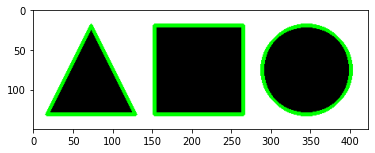

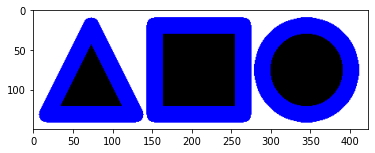

In [ ]:
#im2, contour0, hierarchy = cv2.findContours(binary_img, 
contour0, hierarchy = cv2.findContours(binary_img,
                                       cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_NONE) #contour0 갯수, 세포 수 
#plt.imshow(im2,cmap='gray')
print('case I  도형의 갯수: {}'.format(len(contour0))) #contour0 갯수
print(hierarchy)  #구조 hierarchy


# Draw Contour with Green ## 밑에거 보다 이게 더 쉬움
img = img_ori.copy() #.copy() 원본 망가질 수 있음
cv2.drawContours(img, contour0, -1, (0,255,0), 4) 
#print(img.shape)
plt.figure()
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


# Draw all point on the Contour with BLUE color.
cnt = np.zeros([3]) # 3개로 된 0으로 채워진 배열
index = 0
for i in contour0:
    cnt[index] = len(i)  #점의 갯수 count 
    index +=1
    for j in i:   # 중점값 나올 수 있음, 반올림 (기말 프로젝트)
        cv2.circle(img, tuple(j[0]), 10, (255,0,0), -1) #tuple(j[0]) j첫번째 좌표 #원으로 다 그림

#print(img.shape)     
plt.figure()
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()


## case II : `cv2.RETR_EXTERNAL` + `cv2.CHAIN_APPROX_SIMP`

* 가장 외곽의 contour에 대한 **꼭지점 point의 좌표만**을 찾음.
(행교수님 잘 안씀)

case II 도형의 갯수: 3
(150, 423, 3)
(150, 423, 3)


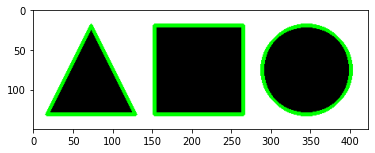

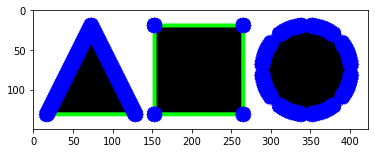

[152.   4. 225.]


In [ ]:
contour1, hierarchy = cv2.findContours(binary_img, 
                                       cv2.RETR_EXTERNAL, 
                                       cv2.CHAIN_APPROX_SIMPLE)
print('case II 도형의 갯수: {}'.format(len(contour1)))

# Draw Contour with Green
img = img_ori.copy()
cv2.drawContours(img, contour1, -1, (0,255,0), 4)
print(img.shape)
plt.figure()
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Draw all point on the Contour with BlUE color.
cnt = np.zeros([3])
index = 0
for i in contour1:
    cnt[index] = len(i)
    index +=1
    for j in i:
        cv2.circle(img, tuple(j[0]), 10, (255,0,0), -1)

print(img.shape)
plt.figure()
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
print(cnt)

## Hierarchy of Contours

인자로 넘겨준 mode에 따라 contour의 hierarchy가 다르게 반환됨.

* **cv2.RETR_EXTERNAL** : 최외각의 coutour만 제공.
* **cv2.RETR_TREE** : 모든 라인의 모든 계층 정보를 트리 구조로 제공.


In [ ]:
url = 'https://raw.githubusercontent.com/dsaint31x/OpenCV_Python_Tutorial/master/images/shapes_donut.png'
fstr = 'shapes_donut.png'
request.urlretrieve(url,fstr)
print('saved ok : shapes_donut.png')

saved ok : shapes_donut.png


(154, 421)


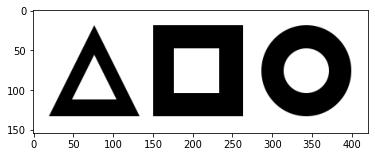

In [ ]:
img = cv2.imread('./shapes_donut.png')
img_ori = img.copy()

img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(img_gray.shape)
plt.imshow(img_gray,cmap='gray')
plt.show()

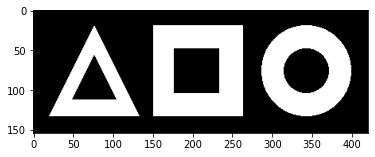

In [ ]:
# convert to a binary image and invert image
ret_threshold, binary_img = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV) 
plt.imshow(binary_img, cmap='gray')

## 최외각의 contour 정보만을 제공.

* cv2.RETR_EXTERNAL

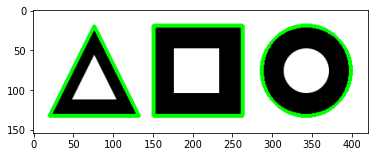

In [ ]:
contour0, hierarchy0 = cv2.findContours(binary_img, 
                                        cv2.RETR_EXTERNAL,
                                        cv2.CHAIN_APPROX_NONE)
img = img_ori.copy()
cv2.drawContours(img, contour0, -1, (0,255,0), 3)
plt.imshow(img)

* hierachy 는 4개의 column으로 구성된 list로 반환됨.

In [ ]:
print('# of contours:',len(contour0))
print(['next','prev','first_child','parent'])
print(hierarchy0)

# of contours: 3
['next', 'prev', 'first_child', 'parent']
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]


##  모든 라인의 모든 계층 정보를 트리 구조로 제공.

* cv2.RETR_TREE 

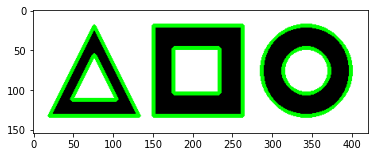

In [ ]:
contour1, hierarchy1 = cv2.findContours(binary_img, 
                                        cv2.RETR_TREE,
                                        cv2.CHAIN_APPROX_SIMPLE)
img = img_ori.copy()
cv2.drawContours(img, contour1, -1, (0,255,0), 3)
plt.imshow(img)
plt.show()


# of contours: 6
['next', 'prev', 'first_child', 'parent']
[[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [ 4  0  3 -1]
  [-1 -1 -1  2]
  [-1  2  5 -1]
  [-1 -1 -1  4]]]


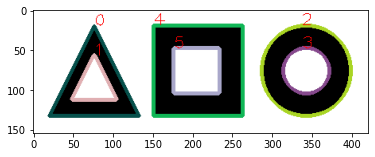

In [ ]:
img = img_ori.copy()
# 모든 컨투어 그리기 
for idx, cont in enumerate(contour1): 
    # 랜덤한 컬러 추출 
    color = [int(i) for i in np.random.randint(0,255, 3)]
    # 컨투어 인덱스 마다 랜덤한 색상으로 그리기 
    cv2.drawContours(img, contour1, idx, color, 3)
    # 컨투어 첫 좌표에 인덱스 숫자 표시 
    cv2.putText(img, 
                str(idx), 
                tuple(cont[0][0]), 
                cv2.FONT_HERSHEY_PLAIN,
                1.5, 
                (255,0,0))
plt.imshow(img)
print('# of contours:',len(contour1))
print(['next','prev','first_child','parent'])
print(hierarchy1) #-1 없음 //순서가 다를 수 있음 알고리즘 따라 솔직히 잘 안씀

## 다른 모드들

In [ ]:
contour2, hierarchy2 = cv2.findContours(
    binary_img, 
    #cv2.RETR_CCOMP, #2계층까지. 
    cv2.RETR_LIST, #계층정보없이 모든 contour #조금 빠를뿐,,
    cv2.CHAIN_APPROX_SIMPLE)
print(['next','prev','first_child','parent'])
print(hierarchy2)  

['next', 'prev', 'first_child', 'parent']
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [-1  4 -1 -1]]]


CONTOUR 가장 많이 씀 아래

## 숫자 인식을 위한 기본 처리 ??

* CNN등의 Deep Neural Network를 이용하기 위한 전처리

In [ ]:
url = 'https://raw.githubusercontent.com/dsaint31x/OpenCV_Python_Tutorial/master/images/number_2019.png'
fstr = 'number_2019.png'
request.urlretrieve(url,fstr)
print('saved ok : number_2019.png')

saved ok : number_2019.png


(100, 242)


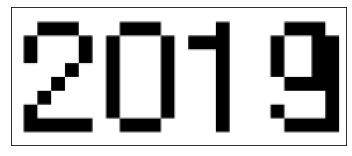

In [ ]:
img = cv2.imread('./number_2019.png')
img_ori = img.copy()

img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(img_gray.shape)
plt.imshow(img_gray,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

# of contour: 4


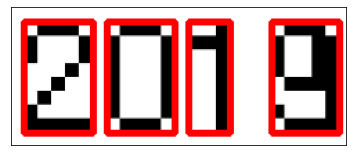

In [ ]:
threshold, binary_img = cv2.threshold(img_gray, 127,255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(binary_img, 
                                       cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_SIMPLE
                                       )
img = img_ori.copy()
print('# of contour:',len(contours))
for contour in contours:
    # print(contour)
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3) #thickness =3

plt.imshow(img)
plt.xticks([]),plt.yticks([])
plt.show()

## Contour Approximation // 반시계 방향으로 돌면서 외곽선을 찾음

* Convex Hull을 이용한 방식 :숙제!!

In [ ]:
url = 'https://raw.githubusercontent.com/dsaint31x/OpenCV_Python_Tutorial/master/images/bad_rect.png'
fstr = 'bad_rect.png'
request.urlretrieve(url,fstr)
print('saved ok : bad_rect.png')

saved ok : bad_rect.png


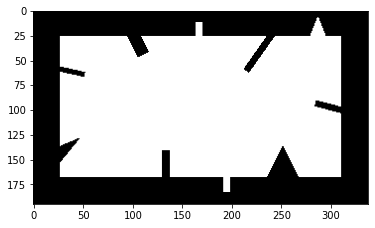

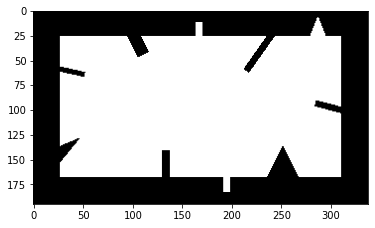

epsilon= 65.43502856492997
bf:1308.70| af:848.00


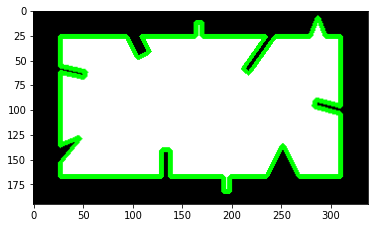

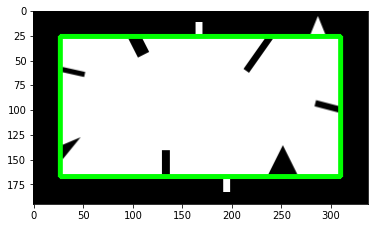

In [ ]:
img0 = cv2.imread('./bad_rect.png')
img1 = img0.copy()

# 그레이스케일과 바이너리 스케일 변환
img_gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY) 
threshold, binary_img = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary_img,cmap='gray')
plt.show()

# 컨투어 찾기 
contours, hierachy = cv2.findContours(binary_img.copy(), 
                                      cv2.RETR_EXTERNAL,
                                      cv2.CHAIN_APPROX_SIMPLE)
contour = contours[0]


# 전체 둘레의 5%로 오차 범위 지정 
app_rate = 0.05  ##단점 이거를 뭘로 잡느냐에 따라 성능이 달라짐 

#전체 contour둘레
epsilon = app_rate * cv2.arcLength(contour, True) 
print('epsilon=',epsilon)

# 근사 컨투어 계산 
# 주어진 contour(곡선 또는 다각형)을 epsilon(오차범위)에 맞춰
# contour에 속하는 점들을 줄인 approxiamation(근사 컨투어)를 반환
#
# param 1 : target contour
# param 2 : 오차범위
# param 3 : contour가 close인가? True : closed
approx = cv2.approxPolyDP(contour, epsilon, True)

print('bf:{:.2f}| af:{:.2f}'.format(
    cv2.arcLength(contour, True), 
    cv2.arcLength(approx, True)
    )
)

# 각각 컨투어 선 그리기 ---④
cv2.drawContours(img0, [contour], -1, (0,255,0), 3)
cv2.drawContours(img1, [approx], -1, (0,255,0), 3)

plt.figure('origianl contour')
plt.imshow(img0[:,:,::-1])
plt.figure('approximated contour')
plt.imshow(img1[:,:,::-1])
plt.show()